In [ ]:
# =======================================================
# FEATURE ENGINEERING
# =======================================================
try:
    # --- Step 1: Define the Target Variable ---
    # We assume 'completion_flag' of 0 means the student churned.
    df['churn'] = 1 - df['completion_flag']
    print("✅ Target variable 'churn' created.")

    # --- Step 2: Select Features ---
    numerical_features = ['age', 'apply_lag', 'start_lag', 'opportunity_duration']
    categorical_features = ['gender', 'opportunity_category'] # We'll start with these for simplicity

    print(f"✅ Selected {len(numerical_features)} numerical and {len(categorical_features)} categorical features.")

    # --- Step 3: Convert Categorical Features to Numbers ---
    # We use one-hot encoding for our selected categorical features
    df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
    print("✅ Categorical features converted to numerical format.")

    # --- Step 4: Combine and Prepare Final Data for Modeling ---
    # Get the names of the new one-hot encoded columns
    encoded_cols = [col for col in df_encoded.columns if any(cat_feature in col for cat_feature in categorical_features)]

    # Define our final features (X) and target (y)
    features = numerical_features + encoded_cols
    X = df_encoded[features]
    y = df_encoded['churn']

    # Handle any potential missing values that might stop the model
    X.fillna(0, inplace=True)

    print("\n✅ Your data is now fully prepared for model building!")
    print(f"You have {X.shape[0]} samples and {X.shape[1]} features for the model.")
    print("\nHere's a preview of your final features (X):")
    display(X.head())

except NameError:
    print("❌ Error: The DataFrame 'df' is not defined. Please run the data loading cell first.")
except KeyError as e:
    print(f"❌ Error: A required column was not found: {e}. Please ensure you are using the updated dataset.")

❌ Error: The DataFrame 'df' is not defined. Please run the data loading cell first.


In [ ]:
# 1. Import all necessary libraries
import pandas as pd

# 2. Define the filename and load the data into the 'df' DataFrame
# We are using the updated CSV file with the encoding fix
file_name = 'Cleaned_Data_Updated.csv'
try:
    df = pd.read_csv(file_name, encoding='latin1')
    print("✅ Updated CSV file loaded successfully!")

    # =======================================================
    # FEATURE ENGINEERING (This is the part that was causing the error)
    # =======================================================
    # --- Step 1: Define the Target Variable ---
    df['churn'] = 1 - df['completion_flag']
    print("✅ Target variable 'churn' created.")

    # --- Step 2: Select Features ---
    numerical_features = ['age', 'apply_lag', 'start_lag', 'opportunity_duration']
    categorical_features = ['gender', 'opportunity_category']

    print(f"✅ Selected {len(numerical_features)} numerical and {len(categorical_features)} categorical features.")

    # --- Step 3: Convert Categorical Features to Numbers ---
    df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
    print("✅ Categorical features converted to numerical format.")

    # --- Step 4: Combine and Prepare Final Data for Modeling ---
    encoded_cols = [col for col in df_encoded.columns if any(cat_feature in col for cat_feature in categorical_features)]

    features = numerical_features + encoded_cols
    X = df_encoded[features]
    y = df_encoded['churn']

    X.fillna(0, inplace=True)

    print("\n✅ Your data is now fully prepared for model building!")
    print(f"You have {X.shape[0]} samples and {X.shape[1]} features for the model.")
    print("\nHere's a preview of your final features (X):")
    display(X.head())

except FileNotFoundError:
    print(f"❌ Error: The file '{file_name}' was not found. Please make sure it is uploaded to your Colab session.")
except Exception as e:
    print(f"An error occurred: {e}")


✅ Updated CSV file loaded successfully!
✅ Target variable 'churn' created.
✅ Selected 4 numerical and 2 categorical features.
✅ Categorical features converted to numerical format.

✅ Your data is now fully prepared for model building!
You have 1701 samples and 10 features for the model.

Here's a preview of your final features (X):


/tmp/ipython-input-2699494677.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


,age,apply_lag,start_lag,opportunity_duration,gender_Female,gender_Male,opportunity_category_Course,opportunity_category_Engagement,opportunity_category_Event,opportunity_category_Internship
0,15,7,133,63.0,True,False,False,False,False,True
1,27,0,145,63.0,True,False,False,False,False,True
2,25,0,20,63.0,False,True,False,False,False,True
3,27,57,11,63.0,False,True,False,False,False,True
4,32,123,15,63.0,False,True,False,False,False,True


In [ ]:
# =======================================================
# STEP 1: SPLIT DATA, TRAIN MODEL, AND EVALUATE
# =======================================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

try:
    # 1. Split the data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("✅ Data successfully split into training and testing sets.")

    # 2. Create and train the Logistic Regression model
    model = LogisticRegression(max_iter=1000) # max_iter helps the model converge
    model.fit(X_train, y_train)
    print("✅ Logistic Regression model trained successfully.")

    # 3. Make predictions on the test data
    y_pred = model.predict(X_test)
    print("✅ Predictions made on the test data.")

    # 4. Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)

    print("\n--- Model Performance ---")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

except NameError:
    print("❌ Error: The feature matrix 'X' and target 'y' are not defined. Please run the feature engineering cell first.")
except Exception as e:
    print(f"An error occurred: {e}")

✅ Data successfully split into training and testing sets.
✅ Logistic Regression model trained successfully.
✅ Predictions made on the test data.

--- Model Performance ---
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       272
           1       0.76      0.61      0.68        69

    accuracy                           0.88       341
   macro avg       0.83      0.78      0.80       341
weighted avg       0.88      0.88      0.88       341



✅ Updated CSV file loaded successfully!
✅ Feature engineering complete.
✅ Logistic Regression model trained.

--- Key Factors Driving Churn ---
Features with a positive score increase the likelihood of churn.
Features with a negative score decrease the likelihood of churn (promote retention).


/tmp/ipython-input-1726647900.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
/tmp/ipython-input-1726647900.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


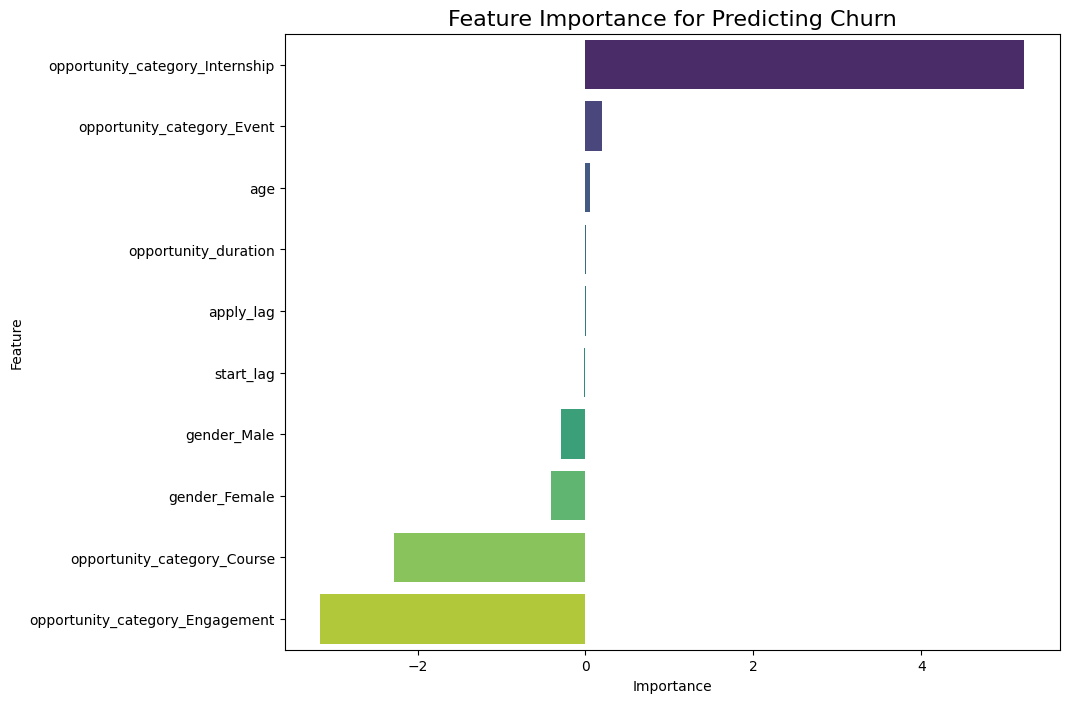

In [ ]:
# =======================================================
# COMPLETE SCRIPT: FROM LOADING DATA TO MODEL INSIGHTS
# =======================================================

# 1. Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 2. Load the updated dataset
file_name = 'Cleaned_Data_Updated.csv'
try:
    df = pd.read_csv(file_name, encoding='latin1')
    print("✅ Updated CSV file loaded successfully!")

    # 3. Perform Feature Engineering
    df['churn'] = 1 - df['completion_flag']
    numerical_features = ['age', 'apply_lag', 'start_lag', 'opportunity_duration']
    categorical_features = ['gender', 'opportunity_category']
    df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
    encoded_cols = [col for col in df_encoded.columns if any(cat_feature in col for cat_feature in categorical_features)]
    features = numerical_features + encoded_cols
    X = df_encoded[features]
    y = df_encoded['churn']
    X.fillna(0, inplace=True)
    print("✅ Feature engineering complete.")

    # 4. Split data and train the Logistic Regression model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    print("✅ Logistic Regression model trained.")

    # 5. Interpret the model to find key drivers of churn
    importance = model.coef_[0]
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    print("\n--- Key Factors Driving Churn ---")
    print("Features with a positive score increase the likelihood of churn.")
    print("Features with a negative score decrease the likelihood of churn (promote retention).")

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Feature Importance for Predicting Churn', fontsize=16)
    plt.show()

except FileNotFoundError:
    print(f"❌ Error: The file '{file_name}' was not found. Please upload the updated CSV file.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
# =======================================================
# STEP 3: BUILD A MORE POWERFUL MODEL - RANDOM FOREST
# =======================================================
from sklearn.ensemble import RandomForestClassifier

try:
    # 1. Create and train the Random Forest model
    # We use the same training and testing sets as before for a fair comparison
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    print("✅ Random Forest model trained successfully.")

    # 2. Make predictions on the test data
    rf_y_pred = rf_model.predict(X_test)
    print("✅ Predictions made with the new model.")

    # 3. Evaluate the new model's performance
    rf_accuracy = accuracy_score(y_test, rf_y_pred)

    print("\n--- Random Forest Model Performance ---")
    print(f"Accuracy: {rf_accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, rf_y_pred))

except NameError:
    print("❌ Error: The training data (X_train, y_train) is not defined. Please run the previous model-building cell first.")
except Exception as e:
    print(f"An error occurred: {e}")

✅ Random Forest model trained successfully.
✅ Predictions made with the new model.

--- Random Forest Model Performance ---
Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       272
           1       0.75      0.74      0.74        69

    accuracy                           0.90       341
   macro avg       0.84      0.84      0.84       341
weighted avg       0.90      0.90      0.90       341



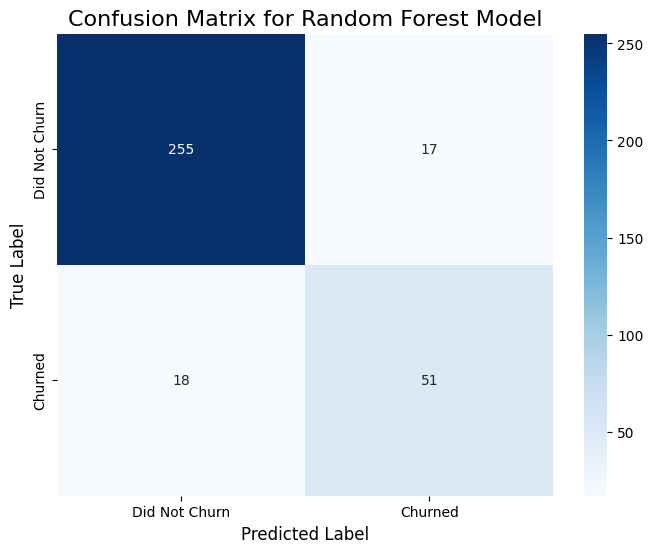

In [ ]:
# =======================================================
# EVALUATION TECHNIQUE 1: CONFUSION MATRIX
# =======================================================
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, rf_y_pred)

    # Create a heatmap for a clear visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Did Not Churn', 'Churned'],
                yticklabels=['Did Not Churn', 'Churned'])
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title('Confusion Matrix for Random Forest Model', fontsize=16)
    plt.show()

except NameError:
    print("❌ Error: The model predictions (rf_y_pred) are not defined. Please run the Random Forest model cell first.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
# =======================================================
# COMPLETE SCRIPT: FROM LOADING DATA TO CROSS-VALIDATION
# =======================================================

# 1. Import all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 2. Load your updated dataset
file_name = 'Cleaned_Data_Updated.csv'
try:
    df = pd.read_csv(file_name, encoding='latin1')
    print("✅ Updated CSV file loaded successfully!")

    # 3. Perform Feature Engineering
    df['churn'] = 1 - df['completion_flag']
    numerical_features = ['age', 'apply_lag', 'start_lag', 'opportunity_duration']
    categorical_features = ['gender', 'opportunity_category']
    df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
    encoded_cols = [col for col in df_encoded.columns if any(cat_feature in col for cat_feature in categorical_features)]
    features = numerical_features + encoded_cols
    X = df_encoded[features]
    y = df_encoded['churn']
    X.fillna(0, inplace=True)
    print("✅ Feature engineering complete.")

    # 4. Split data (needed for training the initial model)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 5. Define and Train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    print("✅ Random Forest model trained.")

    # 6. Perform Cross-Validation Test
    # We use the whole dataset (X, y) for this to get the most reliable estimate
    # cv=5 means it will perform 5 rounds of testing
    print("\n--- Running Cross-Validation ---")
    scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

    print("\n--- Cross-Validation Results ---")
    print(f"Scores for each of the 5 tests: {scores}")
    print(f"\nAverage Accuracy: {scores.mean():.2f}")
    print(f"Standard Deviation: {scores.std():.2f}")

except FileNotFoundError:
    print(f"❌ Error: The file '{file_name}' was not found. Please upload the updated CSV file.")
except Exception as e:
    print(f"An error occurred: {e}")

✅ Updated CSV file loaded successfully!
✅ Feature engineering complete.


/tmp/ipython-input-2883271442.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


✅ Random Forest model trained.

--- Running Cross-Validation ---

--- Cross-Validation Results ---
Scores for each of the 5 tests: [0.89442815 0.80588235 0.86764706 0.93529412 0.94411765]

Average Accuracy: 0.89
Standard Deviation: 0.05
